In [1]:
# performing linear algebra 
import numpy as np 

# data processing 
import pandas as pd 

# visualisation 
import matplotlib.pyplot as plt 




In [4]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv") 

print (df.head()) 


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [5]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#Dataset Cleaning
#‘id’ has no role in prediction
# Drop the 'id' column
df = df.drop(['id'], axis=1)

# Display the updated shape
print(df.shape)




(569, 31)


In [11]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [12]:
#Code: Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0
# Define the function to map diagnosis values
def diagnosis_value(diagnosis):
    return 1 if diagnosis == 'M' else 0

# Apply the mapping to the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

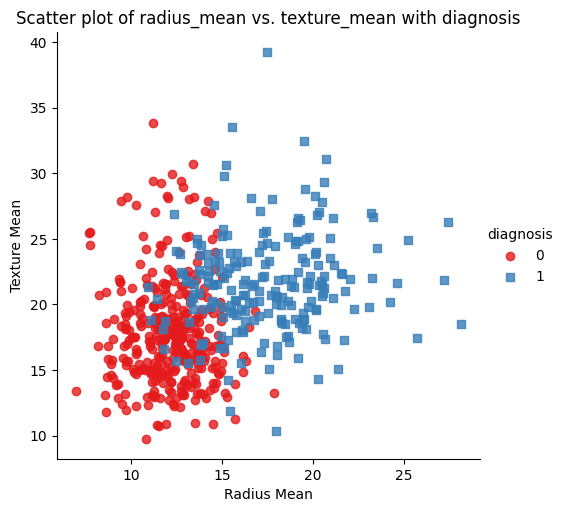

In [13]:
import seaborn as sns
# Create a scatter plot with a regression line using Seaborn
sns.lmplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, 
           markers=["o", "s"], palette="Set1", fit_reg=False)

# Show the plot
plt.title("Scatter plot of radius_mean vs. texture_mean with diagnosis")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()

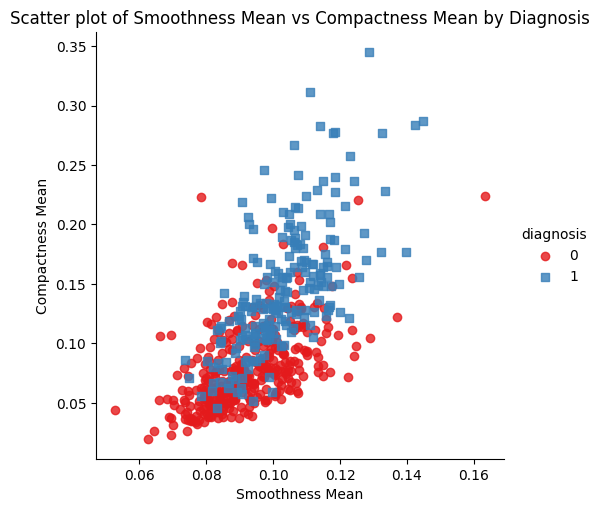

In [15]:
# Scatter plot with regression using Seaborn
sns.lmplot(x='smoothness_mean', y='compactness_mean', 
           data=df, hue='diagnosis', palette="Set1", 
           markers=["o", "s"], fit_reg=False)

# Add titles and labels for clarity
plt.title("Scatter plot of Smoothness Mean vs Compactness Mean by Diagnosis")
plt.xlabel("Smoothness Mean")
plt.ylabel("Compactness Mean")
plt.show()

In [16]:
# Define feature matrix (X) and target vector (y)
# Exclude the 'diagnosis' column for features (X) and assign it separately to (y)
X = np.array(df.iloc[:, 1:])  # All rows, columns except the first ('diagnosis')
y = np.array(df['diagnosis'])  # Diagnosis column as the target

# Print shapes for verification
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (569, 30)
Shape of y: (569,)


In [17]:
#Splitting the Dataset into the Training Set and Test Set

from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Explanation of train-test split:
# - `X_train`, `y_train`: Data used to train the model.
# - `X_test`, `y_test`: Data used to test how well the model performs on unseen data.
# - `test_size=0.33`: 33% of the data is set aside for testing, while 67% is used for training.
# - `random_state=42`: Ensures the split is reproducible.
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Step 2: Initialize the KNN model and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

# Explanation of KNN:
# - KNN (K-Nearest Neighbors) is a simple algorithm that classifies data points based on their neighbors.
# - `n_neighbors=13`: The model considers the 13 nearest neighbors to classify a data point.

KNeighborsClassifier(n_neighbors=13)

In [20]:
# Step 3: Perform cross-validation for different values of k
neighbors = []  # To store the values of k
cv_scores = []  # To store the accuracy scores for each k

# Iterate over odd values of k from 1 to 50
for k in range(1, 51, 2):
    neighbors.append(k)  # Store the value of k
    knn = KNeighborsClassifier(n_neighbors=k)  # Create a KNN model with the current k
    # Perform 10-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())  # Store the mean accuracy for the current k

# Explanation of cross-validation:
# - Splits the training data into 10 parts (folds) and trains the model on 9 parts, testing on the 10th.
# - Repeats this process 10 times, using a different part as the test set each time.
# - The average accuracy across all folds is stored for each k.

In [21]:
# Step 4: Calculate the misclassification error for each k
MSE = [1 - x for x in cv_scores]

In [22]:
# Step 5: Determine the optimal value of k (minimum misclassification error)
optimal_k = neighbors[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is {optimal_k}')

The optimal number of neighbors is 3


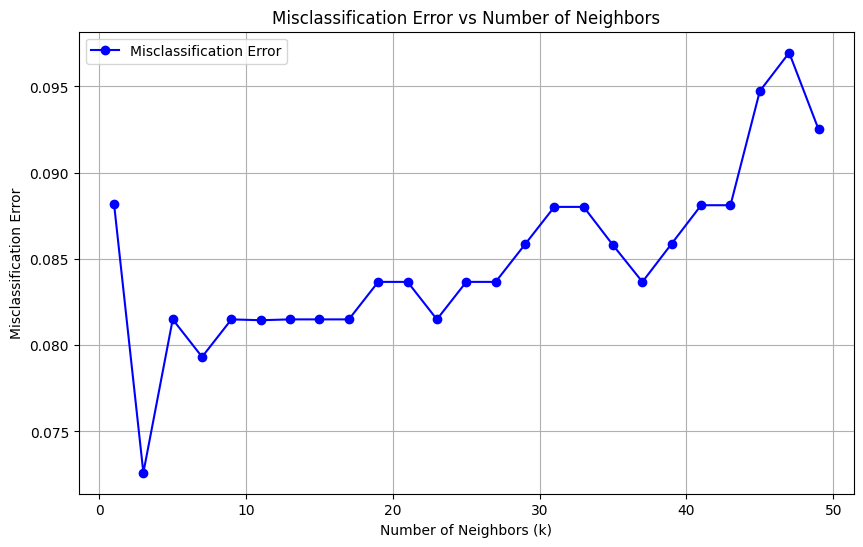

In [23]:
# Step 6: Plot misclassification error versus k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE, marker='o', linestyle='-', color='b', label='Misclassification Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Train the final KNN model with the optimal number of neighbors
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_final.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the performance metrics
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Performance Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.88
F1 Score: 0.90



Confusion Matrix:
[[68  3]
 [ 5 38]]


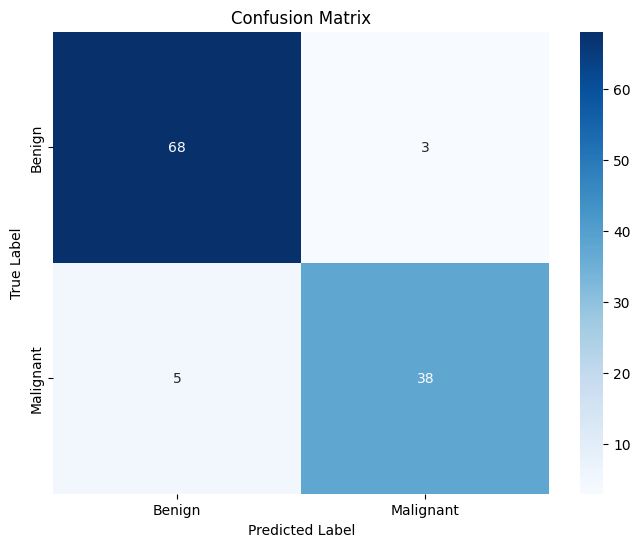

In [25]:
# Display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.96      0.94        71
   Malignant       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

